# Dataset Balancing using pandas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.utils import shuffle
path = "./dataJoe/"

In [ ]:
# df =pd.read_csv(path+'dataset.csv')
# classG = df[df['class'] == 'g']
# classH = df[df['class'] == 'h']
# countG, countH = df['class'].value_counts()

In [ ]:
# classGUnder = classG.sample(countH)
# newDataset = pd.concat([classGUnder, classH],axis=0)
# newDataset.to_csv(path+'balanced_dataset.csv',index=False)

In [ ]:
# newDataset['class'].hist()

# Reading Data without recreating it each time

In [2]:
newDataset = pd.read_csv(path+'balanced_dataset.csv')


# Data Split

In [3]:
x= newDataset.drop('class',axis=1) # 1 for column, 0 for index
y= newDataset['class']

In [4]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True)


# Importing the models

In [5]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree

In [6]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.80      0.78      0.79      2024
           h       0.78      0.80      0.79      1989

    accuracy                           0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013



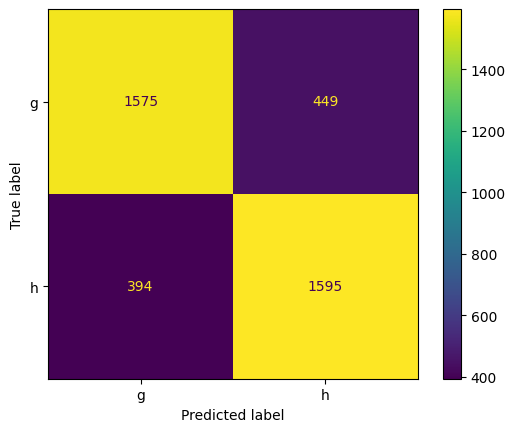

In [8]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

In [9]:
#tree.plot_tree(model)
#plt.show()

# AdaBoost

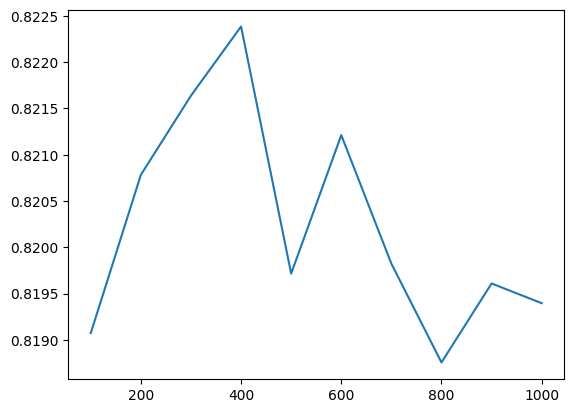

In [10]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
greatestScore = 0 
greatestN = 0
scores = []
for n in n_estimators:
    model = AdaBoostClassifier(n_estimators=n)
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestN = n
plt.plot(n_estimators,scores)
plt.show()

In [11]:
greatestN

400

              precision    recall  f1-score   support

           g       0.81      0.83      0.82      2024
           h       0.83      0.80      0.81      1989

    accuracy                           0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013



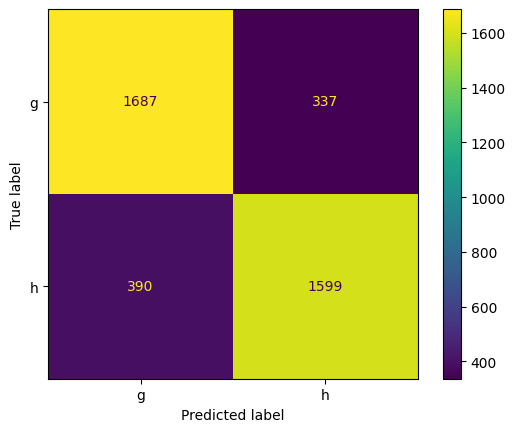

In [12]:

model = AdaBoostClassifier(n_estimators=greatestN)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show() 

# KNN

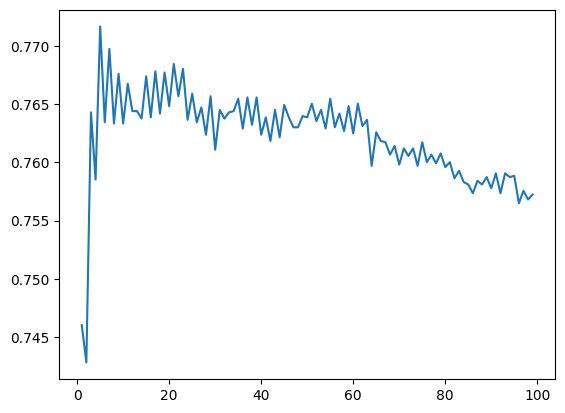

In [13]:
greatestScore = 0
greatestK = 0
scores = []
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    # scores = cross_validate(model, x_train, y_train, cv=10,scoring='accuracy')
    # score = scores['test_score'].mean()
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestK = k
plt.plot(range(1,100),scores)
plt.show()

In [14]:
greatestK

5

In [15]:
model = KNeighborsClassifier(n_neighbors=greatestK)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.74      0.84      0.78      2024
           h       0.81      0.70      0.75      1989

    accuracy                           0.77      4013
   macro avg       0.77      0.77      0.77      4013
weighted avg       0.77      0.77      0.77      4013



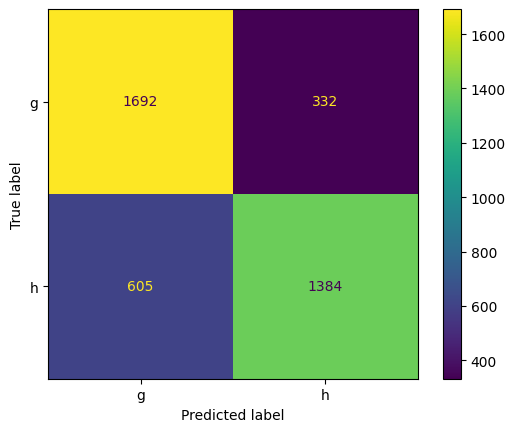

In [17]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Random Forest

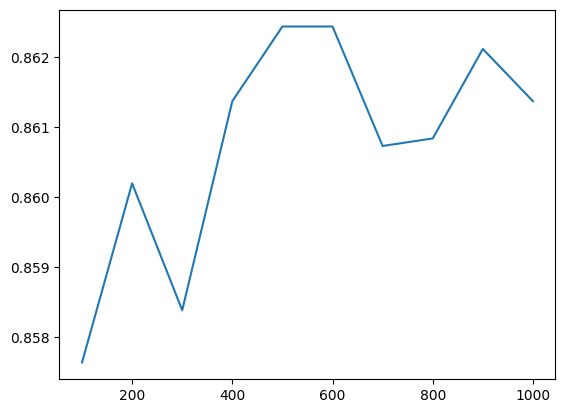

In [18]:
#estimate the best n_estimators for random forest
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
greatestScore = 0
greatestN = 0
scores = []
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n)
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestN = n
plt.plot(n_estimators,scores)
plt.show()


In [19]:
model = RandomForestClassifier(n_estimators=greatestN)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.85      0.89      0.87      2024
           h       0.89      0.83      0.86      1989

    accuracy                           0.86      4013
   macro avg       0.87      0.86      0.86      4013
weighted avg       0.87      0.86      0.86      4013



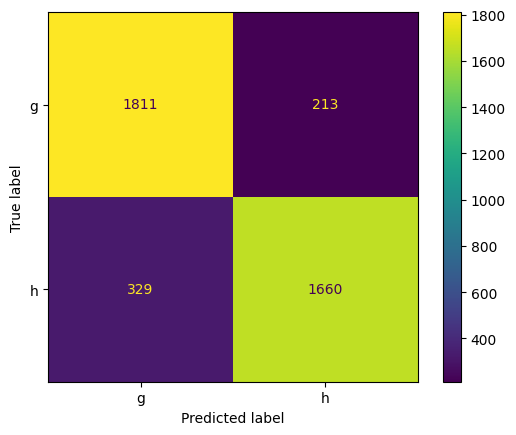

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Naive Bayes

In [22]:
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.61      0.90      0.72      2024
           h       0.79      0.41      0.54      1989

    accuracy                           0.65      4013
   macro avg       0.70      0.65      0.63      4013
weighted avg       0.70      0.65      0.63      4013



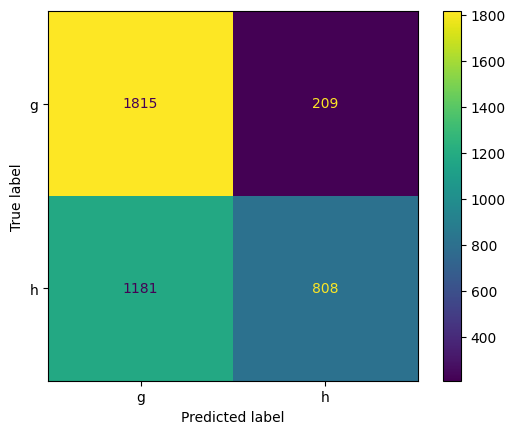

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Neural Network using Pytorch